In [42]:
# Credit Card Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\data\credit_card.csv', encoding='utf-8')

In [3]:
df.head()

,Client_Num,Card_Category,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,Week_Start_Date,Week_Num,Qtr,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Use Chip,Exp Type,Interest_Earned,Delinquent_Acc
0,708082083,Blue,200,0,87,01-01-2023,Week-1,Q1,2023,3544.0,1661,15149,111,0.469,Chip,Travel,4393.21,0
1,708083283,Blue,445,1,108,01-01-2023,Week-1,Q1,2023,3421.0,2517,992,21,0.736,Swipe,Entertainment,69.44,0
2,708084558,Blue,140,0,106,01-01-2023,Week-1,Q1,2023,8258.0,1771,1447,23,0.214,Chip,Bills,202.58,0
3,708085458,Blue,250,1,150,01-01-2023,Week-1,Q1,2023,1438.3,0,3940,82,0.000,Online,Grocery,236.40,0
4,708086958,Blue,320,1,106,01-01-2023,Week-1,Q1,2023,3128.0,749,4369,59,0.239,Swipe,Fuel,1004.87,1


In [4]:
df.shape

(10108, 18)

In [5]:
df2 = pd.read_csv(r'C:\Users\HP\Downloads\data\customer.csv', encoding='utf-8')

In [6]:
df2.head()

,Client_Num,Customer_Age,Gender,Dependent_Count,Education_Level,Marital_Status,state_cd,Zipcode,Car_Owner,House_Owner,Personal_loan,contact,Customer_Job,Income,Cust_Satisfaction_Score
0,708082083,24,F,1,Uneducated,Single,FL,91750,no,yes,no,unknown,Businessman,202326,3
1,708083283,62,F,0,Unknown,Married,NJ,91750,no,no,no,cellular,Selfemployeed,5225,2
2,708084558,32,F,1,Unknown,Married,NJ,91750,yes,no,no,unknown,Selfemployeed,14235,2
3,708085458,38,M,2,Uneducated,Single,NY,91750,no,no,no,cellular,Blue-collar,45683,1
4,708086958,48,M,4,Graduate,Single,TX,91750,yes,yes,no,cellular,Businessman,59279,1


In [7]:
df2.shape

(10108, 15)

In [8]:
df.isnull().sum()

Client_Num               0
Card_Category            0
Annual_Fees              0
Activation_30_Days       0
Customer_Acq_Cost        0
Week_Start_Date          0
Week_Num                 0
Qtr                      0
current_year             0
Credit_Limit             0
Total_Revolving_Bal      0
Total_Trans_Amt          0
Total_Trans_Vol          0
Avg_Utilization_Ratio    0
Use Chip                 0
Exp Type                 0
Interest_Earned          0
Delinquent_Acc           0
dtype: int64

In [9]:
df2.isnull().sum()

Client_Num                 0
Customer_Age               0
Gender                     0
Dependent_Count            0
Education_Level            0
Marital_Status             0
state_cd                   0
Zipcode                    0
Car_Owner                  0
House_Owner                0
Personal_loan              0
contact                    0
Customer_Job               0
Income                     0
Cust_Satisfaction_Score    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client_Num             10108 non-null  int64  
 1   Card_Category          10108 non-null  object 
 2   Annual_Fees            10108 non-null  int64  
 3   Activation_30_Days     10108 non-null  int64  
 4   Customer_Acq_Cost      10108 non-null  int64  
 5   Week_Start_Date        10108 non-null  object 
 6   Week_Num               10108 non-null  object 
 7   Qtr                    10108 non-null  object 
 8   current_year           10108 non-null  int64  
 9   Credit_Limit           10108 non-null  float64
 10  Total_Revolving_Bal    10108 non-null  int64  
 11  Total_Trans_Amt        10108 non-null  int64  
 12  Total_Trans_Vol        10108 non-null  int64  
 13  Avg_Utilization_Ratio  10108 non-null  float64
 14  Use Chip               10108 non-null  object 
 15  Ex

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Client_Num               10108 non-null  int64 
 1   Customer_Age             10108 non-null  int64 
 2   Gender                   10108 non-null  object
 3   Dependent_Count          10108 non-null  int64 
 4   Education_Level          10108 non-null  object
 5   Marital_Status           10108 non-null  object
 6   state_cd                 10108 non-null  object
 7   Zipcode                  10108 non-null  int64 
 8   Car_Owner                10108 non-null  object
 9   House_Owner              10108 non-null  object
 10  Personal_loan            10108 non-null  object
 11  contact                  10108 non-null  object
 12  Customer_Job             10108 non-null  object
 13  Income                   10108 non-null  int64 
 14  Cust_Satisfaction_Score  10108 non-nul

In [39]:
df.describe()

,Client_Num,Annual_Fees,Activation_30_Days,Customer_Acq_Cost,current_year,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Vol,Avg_Utilization_Ratio,Interest_Earned,Delinquent_Acc,revenue
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.0,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,291.849525,0.574693,96.254056,2023.0,8635.642808,1162.792145,4404.631282,64.864563,0.274851,775.957878,0.060744,5472.438685
std,3.673623e+07,118.339384,0.494414,25.768677,0.0,9093.136113,815.160709,3397.910673,23.475110,0.275720,723.952320,0.238872,4022.591188
min,7.080821e+08,95.000000,0.000000,40.000000,2023.0,1438.300000,0.000000,510.000000,10.000000,0.000000,42.140000,0.000000,722.400000
25%,7.130267e+08,195.000000,0.000000,79.000000,2023.0,2552.750000,355.500000,2155.750000,45.000000,0.022000,326.150000,0.000000,2821.257500
50%,7.179037e+08,295.000000,1.000000,95.000000,2023.0,4549.000000,1276.500000,3899.500000,67.000000,0.175000,559.985000,0.000000,4815.400000
75%,7.727989e+08,395.000000,1.000000,112.000000,2023.0,11070.250000,1784.000000,4741.000000,81.000000,0.503000,962.685000,0.000000,5890.617500
max,8.278908e+08,500.000000,1.000000,172.000000,2023.0,34516.000000,2517.000000,18484.000000,139.000000,0.999000,4785.000000,1.000000,22782.560000


In [40]:
df2.describe()

,Client_Num,Customer_Age,Dependent_Count,Zipcode,Income,Cust_Satisfaction_Score
count,1.010800e+04,10108.000000,10108.000000,10108.000000,10108.000000,10108.000000
mean,7.390104e+08,46.274436,2.345370,91663.071824,56976.101998,3.189256
std,3.673623e+07,8.087876,1.299486,1693.093868,46183.718233,1.263101
min,7.080821e+08,21.000000,0.000000,53010.000000,1250.000000,1.000000
25%,7.130267e+08,41.000000,1.000000,91750.000000,22635.750000,2.000000
50%,7.179037e+08,46.000000,2.000000,91750.000000,44768.500000,3.000000
75%,7.727989e+08,52.000000,3.000000,91750.000000,76392.750000,4.000000
max,8.278908e+08,73.000000,5.000000,99504.000000,239791.000000,5.000000


In [10]:
df['revenue'] = df['Total_Trans_Amt'] + df['Interest_Earned'] + df['Annual_Fees']

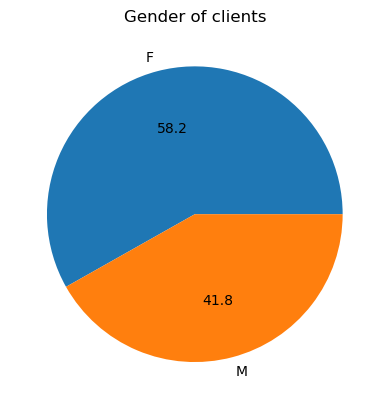

In [16]:
CountG = df2['Gender'].value_counts()
plt.pie(CountG, labels = CountG.index, autopct = '%1.1f')
plt.title("Gender of clients")
plt.show()

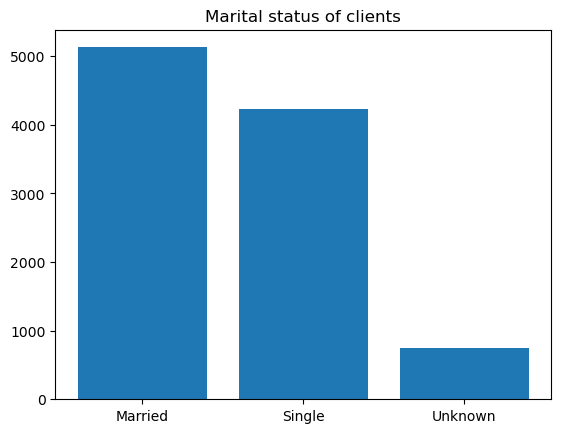

In [15]:
Mstatus = df2['Marital_Status'].value_counts()
plt.bar(Mstatus.index, Mstatus)
plt.title("Marital status of clients")
plt.show()

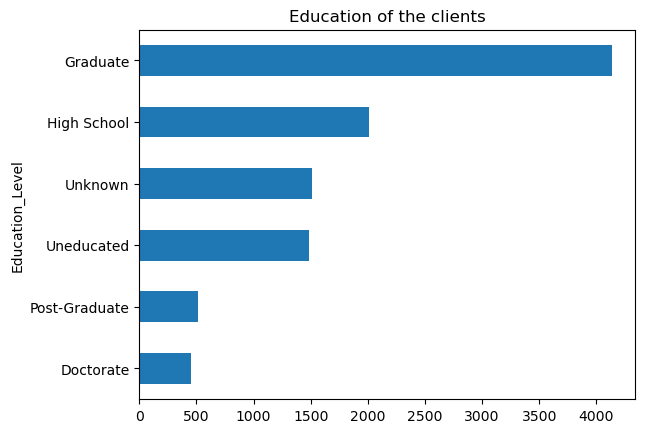

In [13]:
df2['Education_Level'].value_counts(ascending=True).plot.barh() 
plt.title('Education of the clients')
plt.show()

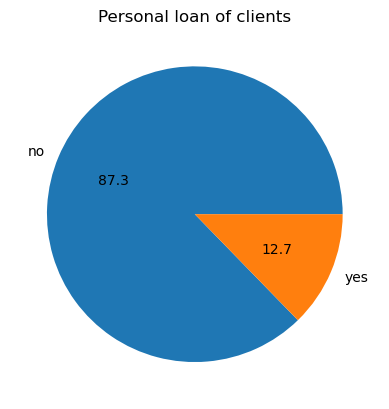

In [26]:
ploan =  df2["Personal_loan"].value_counts()
plt.pie(ploan, labels = ploan.index, autopct='%1.1f')
plt.title('Personal loan of clients')
plt.show()

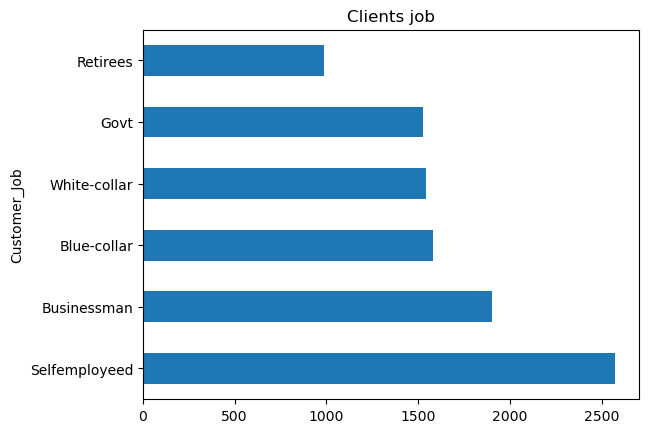

In [35]:
df2['Customer_Job'].value_counts().plot.barh()
plt.title('Clients job')
plt.show()